### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import pickle

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/collegePlace.csv')

In [4]:
df.shape

(2966, 8)

In [5]:
print('Number Of Rows : ',df.shape[0])
print('Number Of Columns : ',df.shape[1])

Number Of Rows :  2966
Number Of Columns :  8


In [6]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [7]:
df.dtypes

,0
Age,int64
Gender,object
Stream,object
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [9]:
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis (EDA)

In [11]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [12]:
df['Age'].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [15]:
df['Internships'].unique()

array([1, 0, 2, 3])

In [16]:
df['CGPA'].unique()

array([8, 7, 6, 9, 5])

In [17]:
df['Hostel'].unique()

array([1, 0])

In [18]:
df['HistoryOfBacklogs'].unique()

array([1, 0])

In [19]:
df['PlacedOrNot'].unique()

array([1, 0])

In [20]:
df['PlacedOrNot'].value_counts()

,count
PlacedOrNot,
1,1639
0,1327


In [21]:
print("The Number Of Students Placed : ", df['PlacedOrNot'].value_counts()[1])
print("The Number Of Students Not Placed : ", df['PlacedOrNot'].value_counts()[0])

The Number Of Students Placed :  1639
The Number Of Students Not Placed :  1327


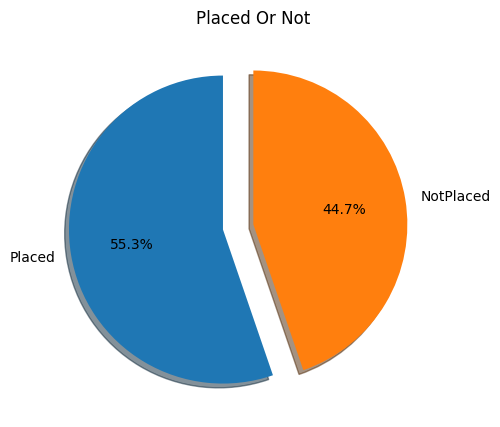

In [23]:
import matplotlib.pyplot as plt

# Assuming df['PlacedOrNot'] contains the placement data
plt.figure(figsize=(10, 5))
plt.pie(
    df['PlacedOrNot'].value_counts(),
    labels=['Placed', 'NotPlaced'],
    autopct='%.1f%%',
    explode=[0.2, 0],  # Explodes the first slice (Placed)
    shadow=True,       # Adds shadow to the chart
    startangle=90      # Starts the pie chart at 90 degrees
)
plt.title("Placed Or Not")
plt.show()


In [24]:
Max = df[(df['Age'] == df['Age'].max()) & (df['PlacedOrNot'] == 1)]['Age'].values[0]
print("Max Age Of Placed Person : ", Max)

Min = df[(df['Age'] == df['Age'].min()) & (df['PlacedOrNot'] == 0)]['Age'].values[0]
print("Min Age Of Placed Person : ", Min)

Max Age Of Placed Person :  30
Min Age Of Placed Person :  19


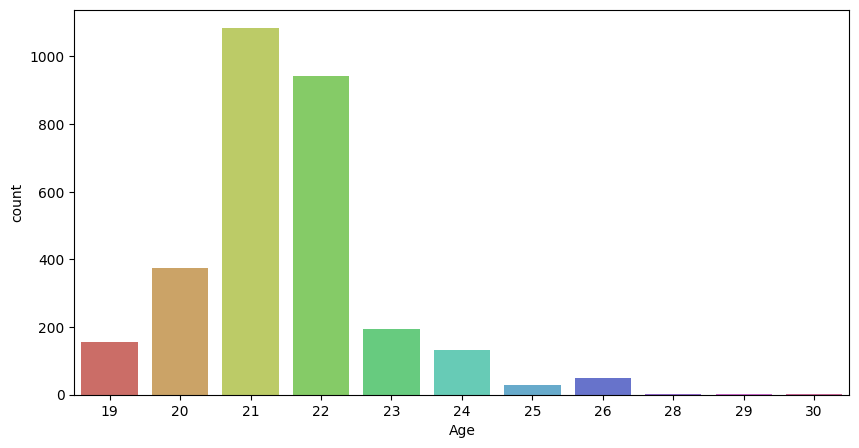

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data = df, palette = 'hls')
plt.show()

In [26]:
M = df[df['Gender'] == 'Male']['Gender'].count()

print("Total Number Of Male Student : ",M)

Total Number Of Male Student :  2475


In [27]:
M_P = df[(df['Gender'] == 'Male') & (df['PlacedOrNot'] == 1)]['PlacedOrNot'].count()

print("Total Number Of Male Student Who Got Placed : ",M_P)
print("Number Of Male Student Who Are Not Placed : ", M - M_P)

Total Number Of Male Student Who Got Placed :  1364
Number Of Male Student Who Are Not Placed :  1111


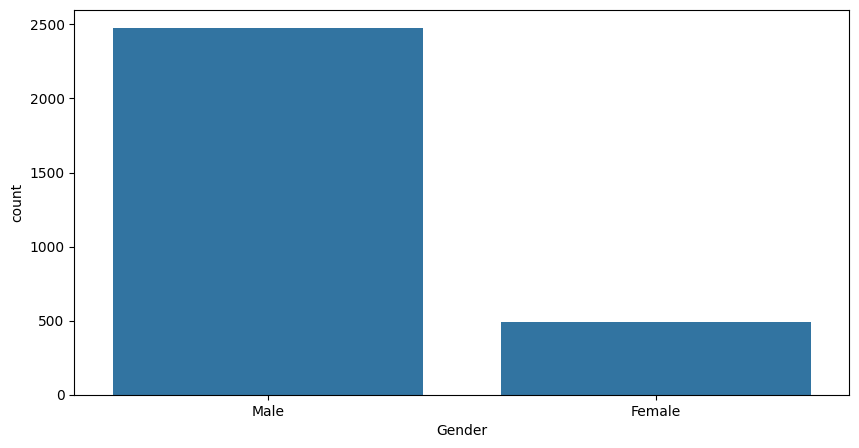

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(x='Gender', data=df)
plt.show()

In [29]:
F = df[df['Gender'] == 'Female']['Gender'].count()

print("Total Number Of Female Student : ",F)

Total Number Of Female Student :  491


In [30]:
M_F = df[(df['Gender'] == 'Female') & (df['PlacedOrNot'] == 1)]['PlacedOrNot'].count()

print("Total Number Of Female Student Who Got Placed : ",M_F)
print("Number Of Female Student Who Are Not Placed : ", F - M_F)

Total Number Of Female Student Who Got Placed :  275
Number Of Female Student Who Are Not Placed :  216


In [31]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

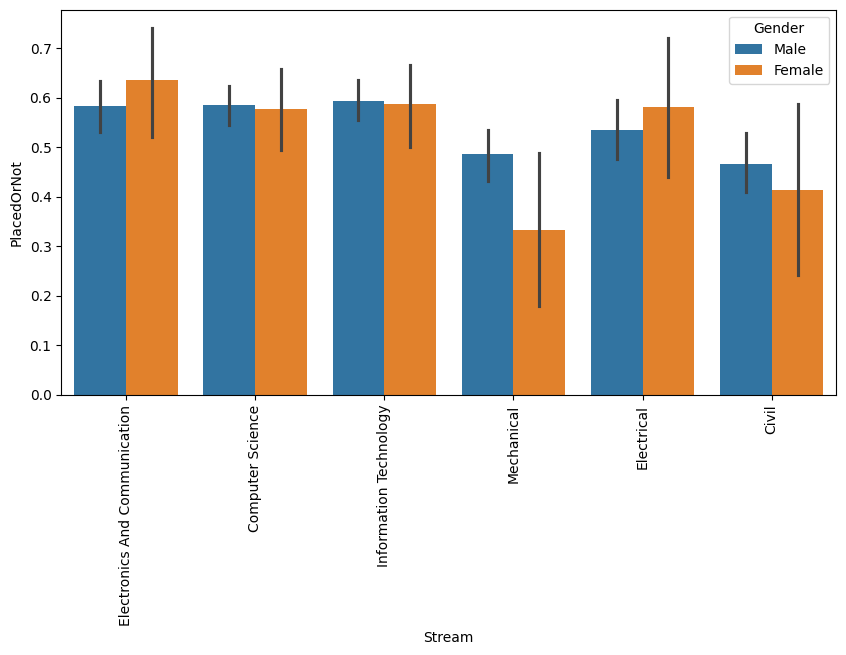

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender").set_xticklabels(labels = df['Stream'].unique(),rotation = 90)
plt.show()

In [33]:
Max_In = df[(df['Internships'] == df['Internships'].max())
          & (df['PlacedOrNot'] == 1)]['Internships'].values[0]

print("Max Internships Done By The Placed Student : ", Max_In)

Max_In_Pl = df[(df['Internships'] == df['Internships'].max())
             & (df['PlacedOrNot'] == 1)]['Internships'].value_counts().values[0]

print("No. Of Student Who Did Max Internships And Are Placed : " , Max_In_Pl)

Max Internships Done By The Placed Student :  3
No. Of Student Who Did Max Internships And Are Placed :  41


In [34]:
Min_In = df[(df['Internships'] == df['Internships'].min())
          & (df['PlacedOrNot'] == 1)]['Internships'].values[0]

print("Min Internships Done By The Placed Student : ", Min_In)

Min_In_Pl = df[(df['Internships'] == df['Internships'].min())
             & (df['PlacedOrNot'] == 1)]['Internships'].value_counts().values[0]

print("No. Of Student Who Did Min Internships And Are Placed : " , Min_In_Pl)

Min Internships Done By The Placed Student :  0
No. Of Student Who Did Min Internships And Are Placed :  654


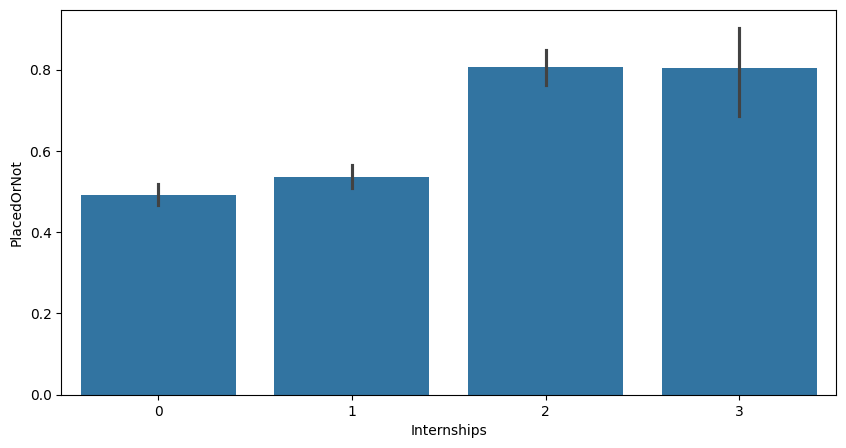

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.Internships, y = df.PlacedOrNot)
plt.show()

In [36]:
Max_C = df[(df['CGPA'] == df['CGPA'].max())
          & (df['PlacedOrNot'] == 1)]['CGPA'].values[0]

print("Max CGPA Obtained By The Placed Student : ", Max_C)

Max_C_Pl = df[(df['CGPA'] == df['CGPA'].max())
             & (df['PlacedOrNot'] == 1)]['CGPA'].value_counts().values[0]

print("No. Of Student Who Has Max CGPA And Are Placed : " , Max_C_Pl)

Max CGPA Obtained By The Placed Student :  9
No. Of Student Who Has Max CGPA And Are Placed :  165


In [37]:
Min_C = df[(df['CGPA'] == df['CGPA'].min())
          & (df['PlacedOrNot'] == 1)]['CGPA'].values[0]

print("Min CGPA Obtained By The Placed Student : ", Min_C)

Min_C_Pl = df[(df['CGPA'] == df['CGPA'].min())
             & (df['PlacedOrNot'] == 1)]['CGPA'].value_counts().values[0]

print("No. Of Student Who Has Min CGPA And Are Placed : " , Min_C_Pl)

Min CGPA Obtained By The Placed Student :  5
No. Of Student Who Has Min CGPA And Are Placed :  7


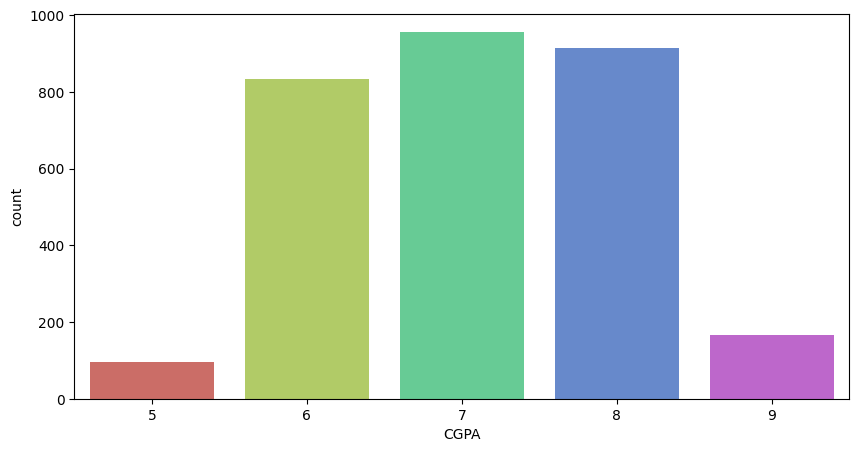

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='CGPA', data = df, palette = 'hls')
plt.show()

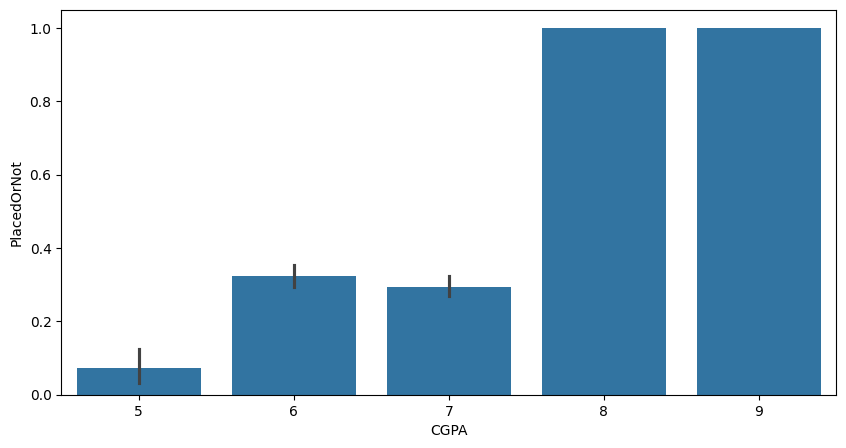

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.CGPA, y = df.PlacedOrNot)
plt.show()

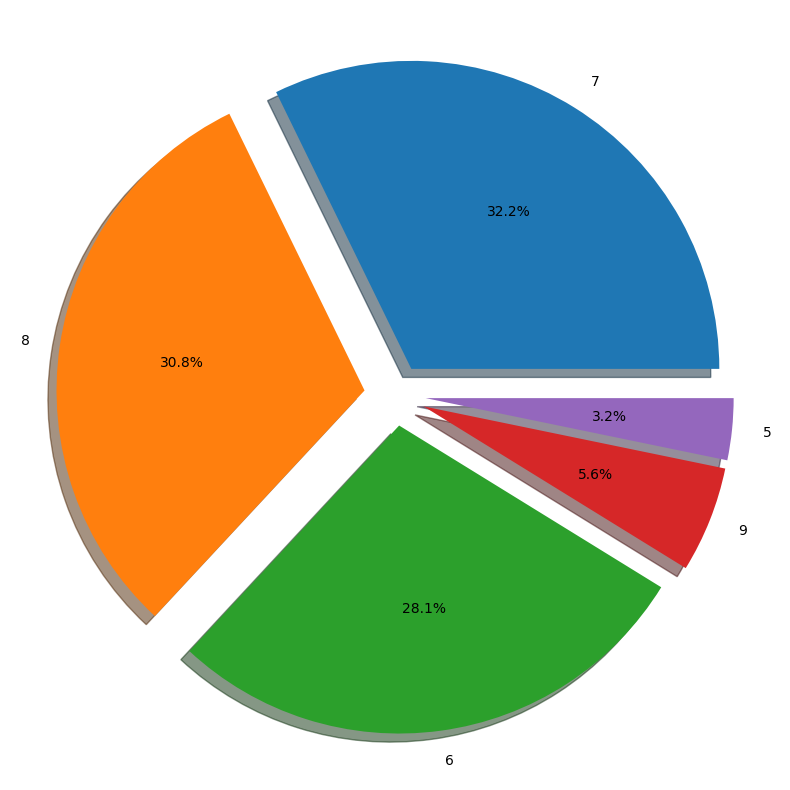

In [40]:
plt.figure(figsize = (10,10))
plt.pie(df['CGPA'].value_counts(),labels = df['CGPA'].value_counts().index,autopct = '%.1f%%',explode =[0.1,0.1,0.1,0.1,0.1],shadow = True)
plt.show()

### Encoding Categorical Data Into Numerical Values

#### For Gender Column

In [41]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [42]:
df['Gender'].map({'Male' : 1 , 'Female' : 0})

,Gender
0,1
1,0
2,0
3,1
4,1
...,...
2961,1
2962,1
2963,1
2964,1


In [43]:
df['Gender'] = df['Gender'].map({'Male' : 1 , 'Female' : 0})

In [44]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


#### For Stream Column

In [45]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [46]:
df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

,Stream
0,1
1,2
2,3
3,3
4,4
...,...
2961,3
2962,4
2963,3
2964,2


In [47]:
df['Stream'] = df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

In [48]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,8,1,1,1
1,21,0,2,0,7,1,1,1
2,22,0,3,1,6,0,0,1
3,21,1,3,0,8,0,1,1
4,22,1,4,0,8,1,0,1


In [49]:
df.dtypes

,0
Age,int64
Gender,int64
Stream,int64
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64


### PairPlot To ShowCase RelationShip Between Each Feature In The Dataset

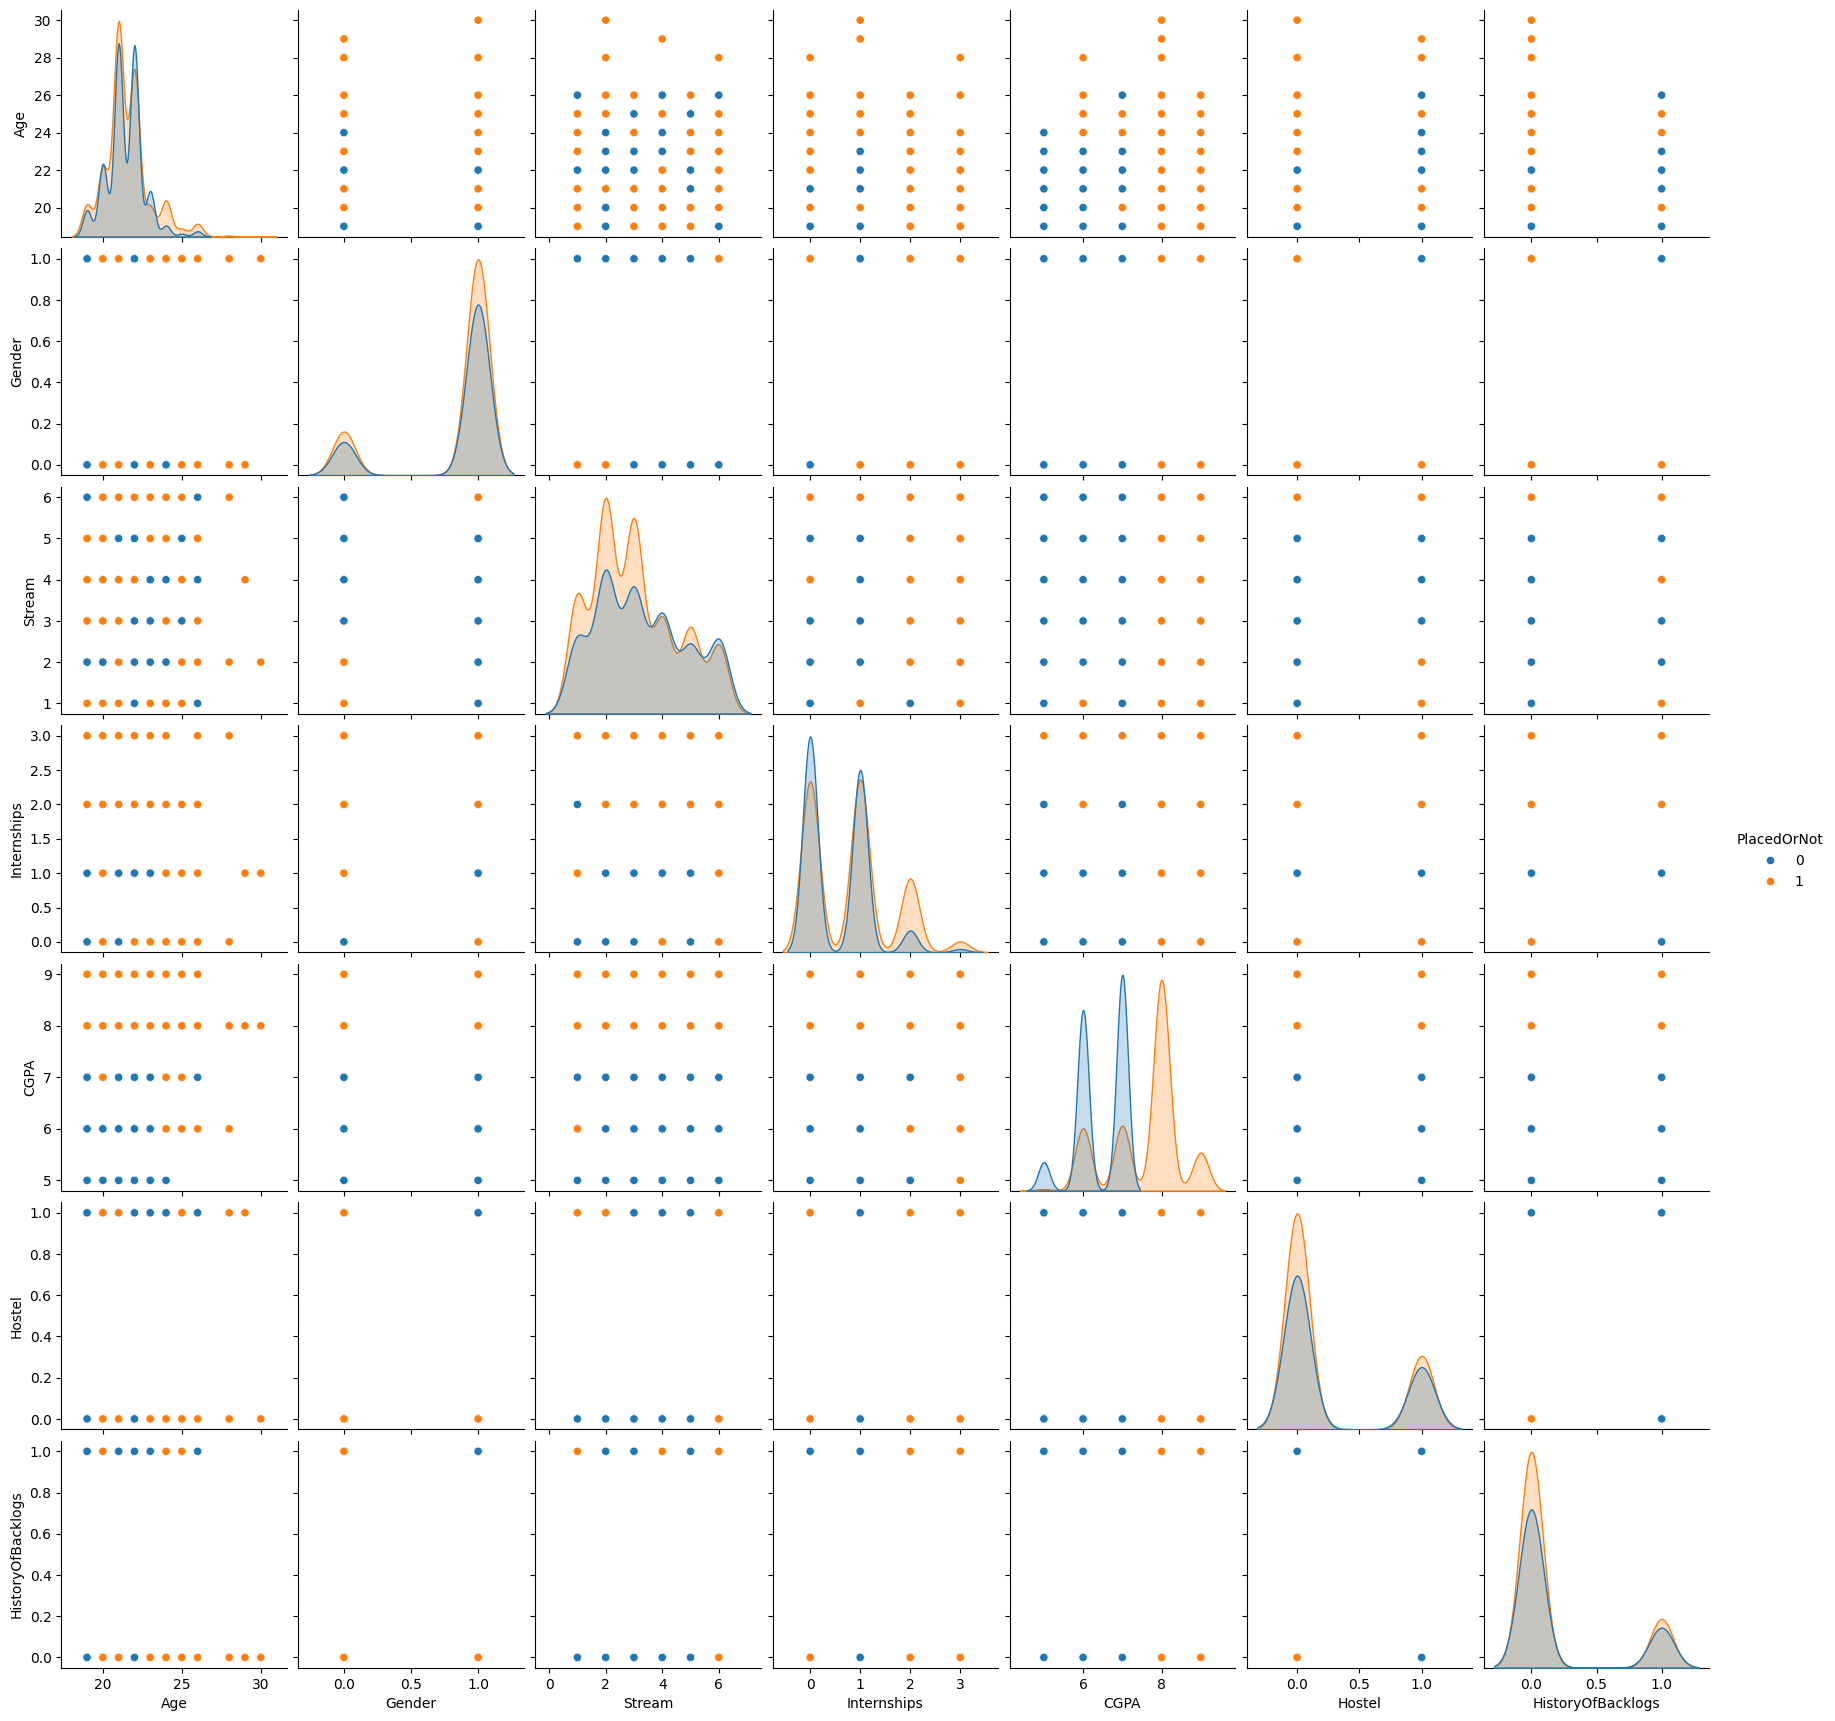

In [50]:
sns.pairplot(df,hue="PlacedOrNot")
plt.show()

### Correlation Matrix And HeatMap Between Each Feature Of Dataset

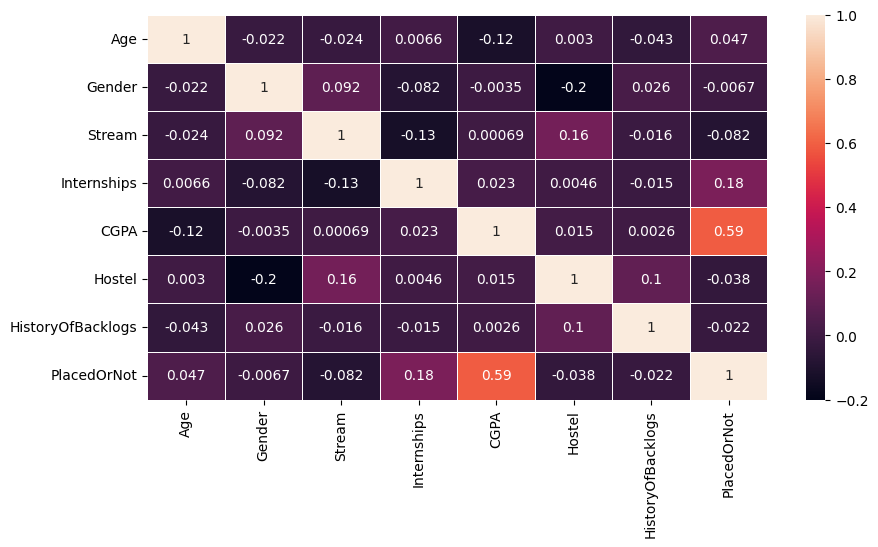

In [51]:
corr = df.corr()

plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True , linewidth = 0.5)
plt.show()

###
### X = Independent Variables
### y = Dependent Variable

In [52]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [53]:
X = df.drop('PlacedOrNot', axis = 1)

In [54]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0
2962,23,1,4,1,7,1,0
2963,22,1,3,1,7,0,0
2964,22,1,2,1,7,0,0


In [55]:
y = df['PlacedOrNot']

In [56]:
y

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1
...,...
2961,0
2962,0
2963,0
2964,0


In [57]:
X.shape

(2966, 7)

In [58]:
y.shape

(2966,)

### Splitting The Dataset Into The Training Set And Test Set

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [60]:
X_train.shape

(1987, 7)

In [61]:
X_test.shape

(979, 7)

In [62]:
y_train.shape

(1987,)

In [63]:
y_test.shape

(979,)

### Training The Models

In [66]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [67]:


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0)  # `verbose=0` suppresses training logs
catboost.fit(X_train, y_train)


from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)


HistGradientBoostingClassifier()

### Prediction On Data

In [68]:

y_pred1 = dt.predict(X_test)        # Decision Tree
y_pred2 = rf.predict(X_test)        # Random Forest
y_pred3 = gb.predict(X_test)        # Gradient Boosting
y_pred4 = xgb.predict(X_test)       # XGBoost
y_pred5 = catboost.predict(X_test)  # CatBoost
y_pred6 = hgb.predict(X_test)       # HistGradient Boosting


### Evaluating The Models

In [69]:
cm1 = confusion_matrix(y_test , y_pred1)
cm2 = confusion_matrix(y_test , y_pred2)
cm3 = confusion_matrix(y_test , y_pred3)
cm4 = confusion_matrix(y_test , y_pred4)
cm5 = confusion_matrix(y_test , y_pred5)
cm6 = confusion_matrix(y_test , y_pred6)

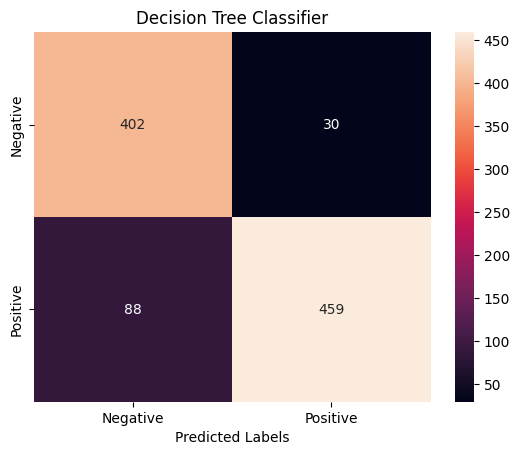

In [70]:
sns.heatmap(cm1 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Labels')
plt.title('Decision Tree Classifier')
plt.show()

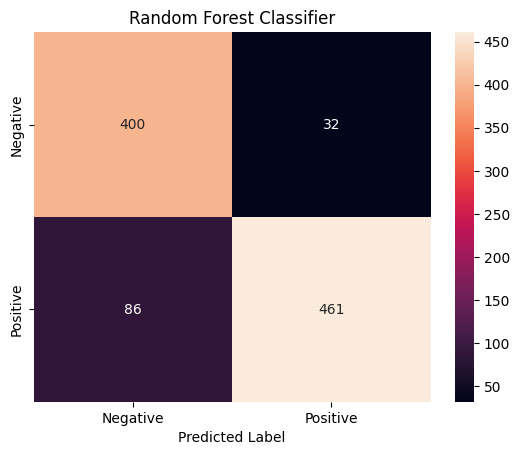

In [71]:
sns.heatmap(cm2 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Random Forest Classifier')
plt.show()

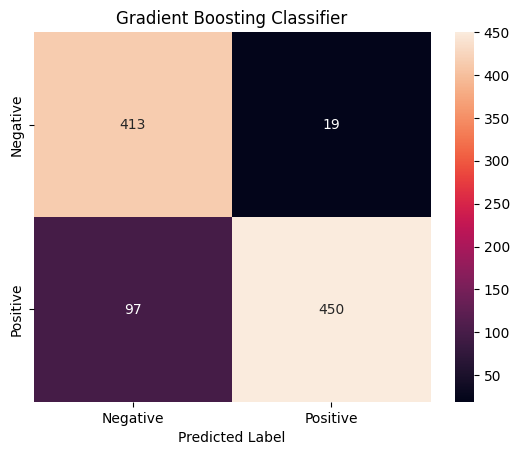

In [72]:
sns.heatmap(cm3 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Gradient Boosting Classifier')
plt.show()

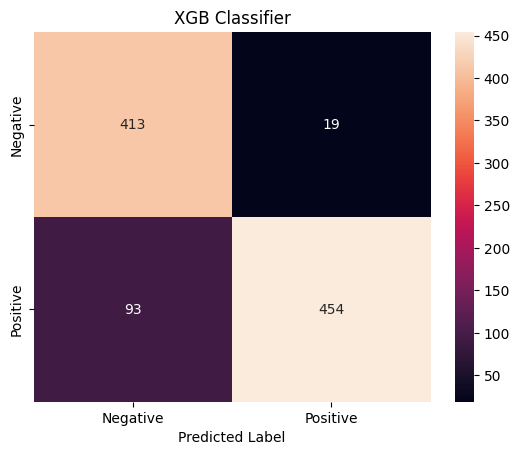

In [73]:
sns.heatmap(cm4 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('XGB Classifier')
plt.show()

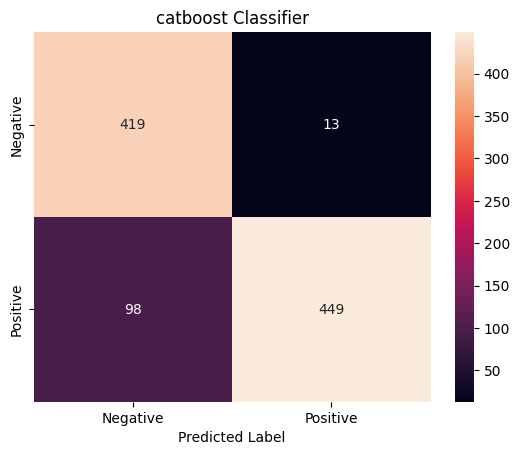

In [74]:
sns.heatmap(cm5 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('catboost Classifier')
plt.show()

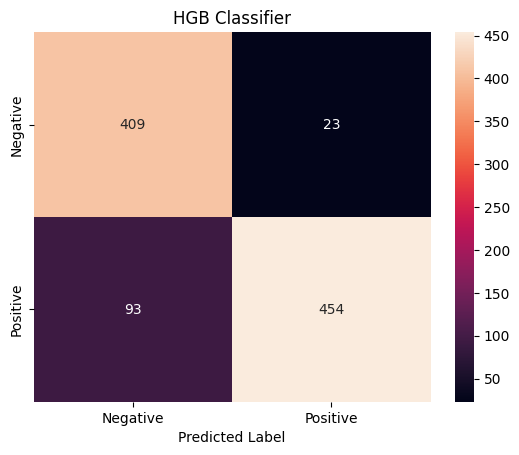

In [75]:
sns.heatmap(cm6 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('HGB Classifier')
plt.show()

In [76]:
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)
acc4 = accuracy_score(y_test,y_pred4)
acc5 = accuracy_score(y_test,y_pred5)
acc6 = accuracy_score(y_test,y_pred6)

In [77]:
prec1 = precision_score(y_test,y_pred1)
prec2 = precision_score(y_test,y_pred2)
prec3 = precision_score(y_test,y_pred3)
prec4 = precision_score(y_test,y_pred4)
prec5 = precision_score(y_test,y_pred5)
prec6 = precision_score(y_test,y_pred6)

In [78]:
r1 = recall_score(y_test,y_pred1)
r2 = recall_score(y_test,y_pred2)
r3 = recall_score(y_test,y_pred3)
r4 = recall_score(y_test,y_pred4)
r5 = recall_score(y_test,y_pred5)
r6 = recall_score(y_test,y_pred6)

In [79]:
f1 = f1_score(y_test,y_pred1)
f2 = f1_score(y_test,y_pred2)
f3 = f1_score(y_test,y_pred3)
f4 = f1_score(y_test,y_pred4)
f5 = f1_score(y_test,y_pred5)
f6 = f1_score(y_test,y_pred6)

In [80]:
final_data = pd.DataFrame({'Models':['DT','RF','GB','XGB','CB','HGB'],
            'ACCURACY':[acc1*100,acc2*100,acc3*100,acc4*100,acc5*100,acc6*100],
            'PRECISION':[prec1*100,prec2*100,prec3*100,prec4*100,prec5*100,prec6*100],
            'RECALL' :[r1*100 , r2*100 , r3 * 100 , r4 * 100 , r5 * 100 , r6 * 100],
            'F1_SCORE':[f1*100 , f2*100 , f3 * 100 , f4 * 100 , f5 * 100 , f6 * 100]})

In [81]:
final_data

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
0,DT,87.946885,93.865031,83.912249,88.610039
1,RF,87.946885,93.509128,84.277879,88.653846
2,GB,88.151175,95.948827,82.266910,88.582677
3,XGB,88.559755,95.983087,82.998172,89.019608
4,CB,88.661900,97.186147,82.084095,88.999009
5,HGB,88.151175,95.178197,82.998172,88.671875


In [82]:
final_data[final_data['ACCURACY'] == final_data['ACCURACY'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,CB,88.6619,97.186147,82.084095,88.999009


In [83]:
final_data[final_data['PRECISION'] == final_data['PRECISION'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,CB,88.6619,97.186147,82.084095,88.999009


In [84]:
final_data[final_data['RECALL'] == final_data['RECALL'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
1,RF,87.946885,93.509128,84.277879,88.653846


In [85]:
final_data[final_data['F1_SCORE'] == final_data['F1_SCORE'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
3,XGB,88.559755,95.983087,82.998172,89.019608


In [106]:
# Comparsion of Result

def graphs(name,Models,df):
  import plotly.express as px
  import pandas as pd

  # # Sample data
  # data = {
  #     'Models': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'HistGradientBoost'],
  #     'Accuracy': [75.5, 85.2, 88.0, 92.1, 91.5, 89.3]
  # }
  # df = pd.DataFrame(data)

  # Create a bar chart with Plotly Express
  fig = px.bar(
      df,
      x='Models',
      y=f'{name}',
      title=f'{name} vs Model Name',
      color=f'{name}',  # Colors based on accuracy values
      text=f'{name}',   # Display accuracy values on bars
      color_continuous_scale='viridis'  # Beautiful color scale
  )

  # Customize the layout
  fig.update_layout(
      title_font_size=20,
      xaxis_title='Model Name',
      yaxis_title=f'{name} (%)',
      xaxis_tickangle=45,  # Rotate x-axis labels for better visibility
      font=dict(size=14),
      plot_bgcolor='rgba(240, 240, 240, 0.9)',  # Light background
  )

  # Add labels to bars
  fig.update_traces(
      texttemplate='%{text:.1f}%',  # Format percentage with 1 decimal
      textposition='outside'       # Place labels outside the bars
  )

  # Show the figure
  fig.show()


In [107]:

l=list(final_data.columns)
for i in range(1,len(l)):
  graphs(l[i],l[0],final_data)


### Training The Best Model On Whole Dataset

In [87]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### Prediction On New Data

In [88]:
new_data = pd.DataFrame({'Age' : 20,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 9,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,20,1,2,0,9,0,0


In [89]:
p = rf.predict(new_data)
if p == 1:
    print('Placed')
else:
    print("Not-placed")

Placed


In [90]:
prob = rf.predict_proba(new_data)

prob

array([[0., 1.]])

In [91]:
print(f"You will be placed with probability of {prob[0][1]:.3f}")

You will be placed with probability of 1.000


### Save Model Using Pickle Library

In [92]:
pickle.dump(rf, open('model.pkl','wb'))

In [93]:
model = pickle.load(open('model.pkl','rb'))

In [94]:
model.predict(new_data)

array([1])

In [95]:
if(model.predict(new_data) == 1):
    print('Placed')
else:
    print('Not Placed')

Placed


In [96]:
new_data = pd.DataFrame({'Age' : 22,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 7,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,2,0,7,0,0


In [97]:
if(model.predict(new_data) == 1):
    print('Placed')
else:
    print('Not Placed')

Not Placed


In [98]:
prob = rf.predict_proba(new_data)

prob

array([[0.82883253, 0.17116747]])